In [1]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import gutenberg 
import spacy 
import requests 
import pandas as pd
import networkx as nx 

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\14159\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14159\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\14159\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
nlp = spacy.load("en_core_web_md") 

In [5]:
# https://pypdf2.readthedocs.io/en/stable/user/extract-text.html
# https://github.com/tqdm/tqdm

import PyPDF2
from tqdm import tqdm

In [6]:
def get_data(file):
    
    data = ""
    
    pdf_file = open(file, 'rb')
    pdf = PyPDF2.PdfReader(pdf_file)
    
    pages = len(pdf.pages)

    for i in tqdm(range(pages)):

        page = pdf.pages[i]
        data = data + page.extract_text() + " "
        
    return data

In [7]:
file = r'C:\Users\14159\Desktop\The God Father\Mario_Puzo_The_Godfather.pdf'

text = get_data(file)

100%|██████████| 377/377 [00:05<00:00, 75.14it/s]


In [8]:
print(text[0:2000])

 
 
THE GODFATHER  
By 
Mario Puzo  
 
 
 
 
 
Courtesy: 
 Shahid Riaz 
Islamabad - Pakistan 
shahid.riaz@gmail.com   “The Godfather” By Mario Puzo  
 
 
 2
Book One   
Chapter 1 
Behind every great fortune there is a crime –  Balzac 
Amerigo Bonasera sat in New York Criminal Court Number  3 and waited for justice; 
vengeance on the men who had so cruelly hurt his daughter, wh o had tried to dishonor 
her. 
The judge, a formidably heavy-featur ed man, rolled up the sleeves of his black robe as if 
to physically chastise the two young men st anding before the bench. His face was cold 
with majestic contempt. But there was somethi ng false in all this that Amerigo Bonasera 
sensed but did not yet understand. 
“You acted like the worst kind of degenerates,” the judge said harshly. Yes, yes, thought 
Amerigo Bonasera. Animals.  Animals. The two young men, glossy hair crew cut, 
scrubbed clean-cut faces composed into hum ble contrition, bowed their heads in 
submission. 
The judge went on. 

In [9]:
len(text)

975207

In [10]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
sentences[1]

'The judge, a formidably heavy-featur ed man, rolled up the sleeves of his black robe as if \nto physically chastise the two young men st anding before the bench.'

In [11]:
## Just in case I need it
##nlp.max_length = 2004399

In [12]:
# strip header junk 
cutoff = text.index('Behind every great') 
text = text[cutoff:] 


In [13]:
print(text)

Behind every great fortune there is a crime –  Balzac 
Amerigo Bonasera sat in New York Criminal Court Number  3 and waited for justice; 
vengeance on the men who had so cruelly hurt his daughter, wh o had tried to dishonor 
her. 
The judge, a formidably heavy-featur ed man, rolled up the sleeves of his black robe as if 
to physically chastise the two young men st anding before the bench. His face was cold 
with majestic contempt. But there was somethi ng false in all this that Amerigo Bonasera 
sensed but did not yet understand. 
“You acted like the worst kind of degenerates,” the judge said harshly. Yes, yes, thought 
Amerigo Bonasera. Animals.  Animals. The two young men, glossy hair crew cut, 
scrubbed clean-cut faces composed into hum ble contrition, bowed their heads in 
submission. 
The judge went on. “You acted like wild beasts in a jungle and you are fortunate you did 
not sexually molest that poor girl or I’d put you behind bars for twenty years.” The judge 
paused, his eyes 

In [14]:
doc = nlp(text) 

sentences = list(doc.sents) 

In [15]:
#Spacy NER

In [16]:
for token in sentences[0]: 

    print('{}: {}'.format(token.text, token.ent_type_)) 

Behind: 
every: 
great: 
fortune: 
there: 
is: 
a: 
crime: 
–: 
 : 
Balzac: PERSON

: PERSON
Amerigo: PERSON
Bonasera: PERSON
sat: 
in: 
New: ORG
York: ORG
Criminal: ORG
Court: ORG
Number: CARDINAL
 : CARDINAL
3: CARDINAL
and: 
waited: 
for: 
justice: 
;: 

: 
vengeance: 
on: 
the: 
men: 
who: 
had: 
so: 
cruelly: 
hurt: 
his: 
daughter: 
,: 
wh: ORG
o: ORG
had: 
tried: 
to: 
dishonor: 

: 
her: 
.: 

: 


In [17]:
doc = nlp(sentences[0].text) 

for ent in doc.ents: 

    print('{}: {}'.format(ent, ent.label_)) 

Balzac 
Amerigo Bonasera: PERSON
New York Criminal Court: ORG
Number  3: CARDINAL
wh o: ORG


In [18]:
def extract_entities(text): 

    doc = nlp(text) 

    sentences = list(doc.sents) 

    entities = [] 

    for sentence in sentences: 

        sentence_entities = []  

        sent_doc = nlp(sentence.text)   

        for ent in sent_doc.ents:   

            if ent.label_ in ['PERSON']: 

                entity = ent.text.strip() 

                if "'s" in entity: 

                    cutoff = entity.index("'s") 

                    entity = entity[:cutoff] 

                if entity != '': 

                    sentence_entities.append(entity) 

        sentence_entities = list(set(sentence_entities)) 

        if len(sentence_entities) > 1: 

            entities.append(sentence_entities) 

    return entities 

In [19]:
morph_entities = extract_entities(text) 

morph_entities 

[['Johnny Fontane', 'su ite'],
 ['Enzo', 'Mario Puzo', 'Katherine'],
 ['Don Vito  Corleone', 'Mario Puzo'],
 ['Don', 'Mario Puzo'],
 ['Sonny Corleone', 'Ita lian'],
 ['Sonny Corleone', 'Lucy Mancini'],
 ['Fred', 'Fr edo', 'Frederico'],
 ['Fred', 'granitelike'],
 ['Michael Corl', 'Mario Puzo'],
 ['Don', 'Michael Corleone'],
 ['Michael Corleone', 'fa mily', 'releas e.', 'Don', 'Mario Puzo'],
 ['Michael Corleone', 'Kay Adams'],
 ['Anthony Coppola', 'Amerigo Bonasera', 'Luca Br asi'],
 ['unexpec ted', 'Mario Puzo'],
 ['handsom', 'Nino Valenti'],
 ['st raitlaced', 'Don Corleone'],
 ['Lucy \nMancini', 'the bri de’s'],
 ['Don', 'Consigliere'],
 ['Enzo', 'Nazorine', 'Katherine'],
 ['Anthony \nCoppola', 'Don Corleone'],
 ['Don', 'fla ttering', 'Anthony Coppola'],
 ['Don', 'Coppola'],
 ['Luca Brasi', 'Don Corleone'],
 ['Kay Adams', 'Luca \nBrasi'],
 ['Michael', 'Kay'],
 ['stu', 'Michael'],
 ['Don', 'Mario Puzo'],
 ['Luca Brasi', 'Don Corleone'],
 ['Michael Co', 'Hagen', 'Kay Adams'],
 ['Michael'

In [20]:
for connection in morph_entities:
    print(connection)

['Johnny Fontane', 'su ite']
['Enzo', 'Mario Puzo', 'Katherine']
['Don Vito  Corleone', 'Mario Puzo']
['Don', 'Mario Puzo']
['Sonny Corleone', 'Ita lian']
['Sonny Corleone', 'Lucy Mancini']
['Fred', 'Fr edo', 'Frederico']
['Fred', 'granitelike']
['Michael Corl', 'Mario Puzo']
['Don', 'Michael Corleone']
['Michael Corleone', 'fa mily', 'releas e.', 'Don', 'Mario Puzo']
['Michael Corleone', 'Kay Adams']
['Anthony Coppola', 'Amerigo Bonasera', 'Luca Br asi']
['unexpec ted', 'Mario Puzo']
['handsom', 'Nino Valenti']
['st raitlaced', 'Don Corleone']
['Lucy \nMancini', 'the bri de’s']
['Don', 'Consigliere']
['Enzo', 'Nazorine', 'Katherine']
['Anthony \nCoppola', 'Don Corleone']
['Don', 'fla ttering', 'Anthony Coppola']
['Don', 'Coppola']
['Luca Brasi', 'Don Corleone']
['Kay Adams', 'Luca \nBrasi']
['Michael', 'Kay']
['stu', 'Michael']
['Don', 'Mario Puzo']
['Luca Brasi', 'Don Corleone']
['Michael Co', 'Hagen', 'Kay Adams']
['Michael', 'Tom']
['Don', 'Sonny']
['Lucy', 'Sonny']
['Sandra', 'Son

In [73]:
node_mapping = {
    'Al  Capone' : 'Al Capone',
    'Capone' : 'Al Capone',
    'America' : 'USA',
    'Amerigo \nBonasera' : 'Amerigo Bonasera',
    'Amerigo Bonaser': 'Amerigo Bonasera',
    'Bonasera': 'Amerigo Bonasera',
    'Anthony \nCoppola' : 'Anthony Coppola',
    'Al Neri' : 'Albert Neri',
     'Al Neri':  'Albert Neri',  
    'Baines': 'Wax Baines',
    'e. Baines': 'Wax Baines',
    'Don Emilio Barzini': 'Barzini',
    'Barz ini' : 'Barzini',
    'Barz ini’s' : 'Barzini',
    'Barz ini' : 'Barzini',
    'Barzini \nFamilies' : 'Barzini',
    'Bati sta' : 'Batista',
    'Bocchicchio' : 'Bocchiochio',
    'Bocchicch' : 'Bocchiochio',
    'Bocchicchios': 'Bocchiochio',
    'Bocchiochio': 'Bocchiochio',
    'Bocchiochios': 'Bocchiochio',
    'china': 'China',
    'Consiglieres' : 'Consigliere',
    'Corelone' : 'Corleone',
    'Corieone': 'Corleone',
    'Corleones' : 'Corleone Family',
    'Luc a.': 'Luca Brasi',
    'Luca': 'Luca Brasi',
    'Luca \nBrasi': 'Luca Brasi',
    'Luca Br asi': 'Luca Brasi',
    'Br asi' : 'Luca Brasi',
    'Brasi' : 'Luca Brasi',
    'Bruno': 'Bruno Tattaglia', 
    'Bruno \nTattaglia' : 'Bruno Tattaglia',
    'Carlo Rizzo': 'Carlo Rizzi',
    'Carlo \nRizzi' : 'Carlo Rizzi',
    'Carlo': 'Carlo Rizzi',
    'Carlo Tramonti': 'Carlo Tremonti',
    'Calif' : 'California',
    'Conn': 'Connie Corleone',
    'Connie \nCorleone': 'Connie Corleone',
    'Connie Corleo': 'Connie Corleone',
    'Connie' : 'Connie Corleone',
    'Connie  Corleone' : 'Connie Corleone', 
    'Connie Corleone' : 'Connie Corleone',
    'Connie Co': 'Connie Corleone',
    'Connie Rizzi': 'Connie Corleone',
    'Constanzia Corl': 'Connie Corleone',
    'Consiglie' : 'Consigliere',
    'Dartmouth College' : 'Dartmouth', 
    'De tective Siriani' : 'Detective Siriani',
    'Deanna \nDunn' : 'Deanna Dunn',
    'Don Co': 'Vito Corleone' ,
    'Don Corl': 'Vito Corleone' ,
    'Don Corle': 'Vito Corleone' ,
    'Don \nCorleone': 'Vito Corleone' ,
    'Don Vito Corleone': 'Vito Corleone' ,
    'Don Corkone': 'Vito Corleone' ,
    'Don Corleo': 'Vito Corleone' ,
    'Don Corleone': 'Vito Corleone' ,
    'Don Corleone’': 'Vito Corleone' ,
    'Don Corleone’s': 'Vito Corleone' ,
    'Don Corteone': 'Vito Corleone' ,
    'Don Vito  Corleone': 'Vito Corleone' ,
    'Vito': 'Vito Corleone' ,
    'Vito \nCorleone': 'Vito Corleone' ,
    'Vito  Corleone': 'Vito Corleone' ,
    'Vito Andolini': 'Vito Corleone' ,
    'Vito Co': 'Vito Corleone' ,
    'Vito Corl': 'Vito Corleone' ,
    'Vito Corle': 'Vito Corleone' ,
    'Vito Corleone': 'Vito Corleone' ,
    'Vito Corleone wa s': 'Vito Corleone' ,
    'Vito Corleoue': 'Vito Corleone' ,
    'Vito sa id': 'Vito Corleone' ,
    'Don' : 'Vito Corleone',
    'Young Vito': 'Vito Corleone' ,
    'morni ng Don Corleone': 'Vito Corleone' ,
    'Godfat' : 'Godfather',
    'Don Phillip Tattaglia' : 'Phillip Tattaglia',
    'Don Tattaglia': 'Phillip Tattaglia',
    'Don Tomm' : 'Don Tommasino',
    'Don Tommasi' : 'Don Tommasino', 
    'Tommasino' : 'Don Tommasino', 
    'Fanucc i’s': 'Fanucci',
    'Feli x Bocchiochio' : 'Felix Bocchiochio',
    'Felix \nBocchicchio': 'Felix Bocchiochio',
    'Felix' : 'Felix Bocchiochio',
    'Felix Bocchicchio': 'Felix Bocchiochio',
    'Felix Bocchiochio' : 'Felix Bocchiochio',
    'Filom ena': 'Filomena',
    'Fr ank Falcone' : 'Frank Falcone',
    'Falcone': 'Frank Falcone',
    'Fr edo' : 'Fredo',
    'Freddie': 'Fredo',
    'Fred': 'Fredo',
    'Freddi': 'Fredo',
    'Freddie Corleone': 'Fredo',
    'Frederico': 'Fredo',
    'Frederico Corleone': 'Fredo',
    'Frederioo': 'Fredo',   
    'Fr eddie': 'Fredo', 
    'Freddie \nCorleone': 'Fredo',
    'Freddie ou t. Leave': 'Fredo',
    'Fordham' : 'Fordham University',
    'Fordham Univer' : 'Fordham University',
    'G od' : 'God',
    'G odfather' : 'Godfather',
    'Genco' : 'Genco Abbandando',
    'Genco Pura': 'Genco Abbandando',
    'Genco \nAbbandando' : 'Genco Abbandando',
    'Genco wh ile' : 'Genco Abbandando',
    'Genco Abban': 'Genco Abbandando',
    'Genco Abbandando': 'Genco Abbandando',
    'Gencp Abbandando': 'Genco Abbandando',
    'George Washi' : 'George Washington', 
    'Virginia': 'Ginny Fontane',
    'Ginny' : 'Ginny Fontane',
    'Goff' : 'Bill Goff',
    'Billy': 'Bill Goff',
    'Billy Goff': 'Bill Goff',
    'Greene': 'Moe Greene',
    'Ha vana': 'Havana',
    'Havanas': 'Havana',
    'Thomas Hagen': 'Tom Hagen',
    'fa Tom Hagen': 'Tom Hagen',
    'e. Hagen': 'Tom Hagen',
    'Tommy': 'Tom Hagen',
    'Tom': 'Tom Hagen',
    'Tom \nHagen': 'Tom Hagen',
    'Tom Hagen': 'Tom Hagen',
    'Hage n' : 'Tom Hagen',
    'Hagen': 'Tom Hagen',
    'wh ile Hagen': 'Tom Hagen',
    'Ho llywood': 'Hollywood',
    'Hollyw' : 'Hollywood',
    'Ita lian' : 'Italian',
    'Jules' : 'Dr. Jules Segal',
    'Jules Sega' : 'Dr. Jules Segal',
    'Jules Segal' : 'Dr. Jules Segal',
    'Jules sa' : 'Dr. Jules Segal', 
    'Jules \nleaned': 'Dr. Jules Segal', 
    'Jules recogni zed': 'Dr. Jules Segal', 
    'Fontane' : 'Johnny Fontane',
    'J ohnny Fontane': 'Johnny Fontane',
    'J ohnny' : 'Johnny Fontane',
    'John ny Fontane': 'Johnny Fontane',
    'Johnn y Fontane': 'Johnny Fontane',
    'Johnny': 'Johnny Fontane',
    'Johnny \nFontane': 'Johnny Fontane',
    'Johnny \ngot': 'Johnny Fontane',
    'Johnny Font ane': 'Johnny Fontane',
    'Johnny  Fontane': 'Johnny Fontane',
    'Johnny Fo ntane’s': 'Johnny Fontane',
    'Johnny Fontane': 'Johnny Fontane',
    'Johnny Fontane si tting': 'Johnny Fontane',
    'Johnny Fontane’s': 'Johnny Fontane',
    'Johnny gr': 'Johnny Fontane',
    'Jack \nDempsey' :'Jack Dempsey' ,
    'Jack Dempsey’s' :'Jack Dempsey' ,
    'Jerry  Wagner' : 'Jerry Wagner',
    'Jack \nWoltz' : 'Jack Woltz',
    'Wolt z.': 'Jack Woltz',
    'Woltz certai nly': 'Jack Woltz',
    'Woltz': 'Jack Woltz',
    'ju dges' : 'judges',
    'Ka y' : 'Kay Adams',
    'Kay': 'Kay Adams',
    'Kay Adams': 'Kay Adams',
    'Kay Adams': 'Kay Adams',
    'Kay Adams Corleone': 'Kay Adams',
    'Kellner' : 'Dr. Frederick Kellner',
    'Los Ange': 'Los Angeles',
    'the Lo s Angeles': 'Los Angeles',
    'Las \nVegas' : 'Las Vegas',
    'Vegas': 'Las Vegas',
    'Las  Vegas': 'Las Vegas',
    'Les \nHalley' : 'Les Halley',
    'Long \nBeach' : 'Long Beach',
    'Lo ng Beach': 'Long Beach',
    'Lucy' : 'Lucy Mancini',  
    'Lucy \nMancini': 'Lucy Mancini',
    'Lucy \nand': 'Lucy Mancini',
    'Lucy Manc ini’s': 'Lucy Mancini',
    'Lucy Mancin': 'Lucy Mancini',
    'Lucy Mancini': 'Lucy Mancini',
    'legi slature' : 'legislature',
    'Mark': 'McCluskey',
    'Mark McCluskey': 'McCluskey',
    'McClu': 'McCluskey',
    'McCluskey': 'McCluskey',
    'Manhatt' : 'Manhattan',
    'Manhatt': 'Manhattan',
    'Mike' : 'Michael Corleone',
    'Michael': 'Michael Corleone',
    'whiske y. Michael' : 'Michael Corleone',
    'Michael wh en' : 'Michael Corleone',
    'Don Michael' : 'Michael Corleone',
    'Mi': 'Michael Corleone',
    'Mi chael': 'Michael Corleone',
    'Mi ke': 'Michael Corleone',
    'Michae': 'Michael Corleone',
    'Michael \nCorleone': 'Michael Corleone',
    'Michael \nrealized': 'Michael Corleone',
    'Michael  Corleone': 'Michael Corleone',
    'Michael Co': 'Michael Corleone',
    'Michael Corl': 'Michael Corleone',
    'Michael Corleone': 'Michael Corleone',
    'Michael pa ssed': 'Michael Corleone',
    'Michael rea lly': 'Michael Corleone',
    'Michael realiz': 'Michael Corleone',
    'Michael secr': 'Michael Corleone',
    'Michael wa s': 'Michael Corleone',
    'nd Michael': 'Michael Corleone',
    'Ta ctfully Michael': 'Michael Corleone',
    'Mikey': 'Michael Corleone',
    'Moe \nGreene' : 'Moe Greene',
    'oe Greene': 'Moe Greene',
    'Moonan' : 'Kevin Moonan',
    'Nazo rine': 'Nazorine', 
    'Ne w York' : 'New York',
    'Ne w York City': 'New York City',
    'New Yo rk Dons' : 'New York Dons',
    'New York \nCity' : 'New York City',
    'New York Cit' : 'New York City',
    'Neri' : 'Al Neri', 
    'New \nHampshire' : 'New Hampshire',
    'New \nJersey': 'New Jersey',
    'New \nYork' : 'New York',
    'New \nYork Families' : 'New York Families',
    'New York’s' : 'New York',    
    'Nino' : 'Nino Valenti',
    'Valenti': 'Nino Valenti',
    'Nino Va': 'Nino Valenti',
    'Nino Valenti': 'Nino Valenti',
    'Pa lermo' : 'Palermo',
    'Palm Spri' : 'Palm Springs',
    'Paul ie Gatto': 'Paulie Gatto',
    'Paulie': 'Paulie Gatto',
    'een Paulie Gatto': 'Paulie Gatto',
    'Paulie \nGatto': 'Paulie Gatto',
    'Paulie  Gatto': 'Paulie Gatto',
    'Paulie Gatto': 'Paulie Gatto',
    'Gatto' : 'Paulie Gatto',
    'P aulie': 'Paulie Gatto',
    'Pete': 'Clemenza',
    'Pete \nClemenza': 'Clemenza',
    'Pete Clemenza': 'Clemenza',
    'Peter \nClemenza': 'Clemenza',
    'Clem enza' : 'Clemenza',
    'Clemenz'  : 'Clemenza',
    'Clemenza' : 'Clemenza',
    'Clemenza wa s' : 'Clemenza',
    'Cle': 'Clemenza',
    'Cle menza': 'Clemenza',
    'Clem': 'Clemenza',
    'Clemen za': 'Clemenza',
    'Clemenza': 'Clemenza',
    'Clemenza s': 'Clemenza',
    'clemenza': 'Clemenza',
    'e. Clemenza': 'Clemenza',
    'sa w Clemenza': 'Clemenza',
    'Peter Clemenza': 'Clemenza',
    'Ro ckefeller Center': 'Rockefeller Center',
    'Rocco' : 'Rocco Lampone',
    'Rocco \nLampone' : 'Rocco Lampone',
    'Rocco Lampone' : 'Rocco Lampone',
    'Lampone' : 'Rocco Lampone',
    'S onny': 'Sonny Corleone',
    'S upreme Court' : 'Supreme Court',
    'Sa ntino': 'Sonny Corleone',
    'Sa ntino dead': 'Sonny Corleone',
    'San \nFrancisco' : 'San Francisco',
    'San Fr': 'San Francisco',
    'San Francisco': 'San Francisco',
    'Si gnora Vitelli': 'Signora Vitelli',
    'Sanrtino Corleone': 'Sonny Corleone',
    'Santino' : 'Sonny Corleone',
    'Santino Corleone' : 'Sonny Corleone',
    'Sandra': 'Sandra Corleone',
    'Sharon' :'Sharon Moore',
    'Sharon M':'Sharon Moore',
    'Virgil Sollozzo': 'Sollozzo',
    'Soliozzo': 'Sollozzo',
    'Sollozzo': 'Sollozzo',
    'Soll ozzo' : 'Sollozzo',
    'llozzo': 'Sollozzo',
    'Sonny': 'Sonny Corleone',
    'Sonny  Corleone': 'Sonny Corleone',
    'Sonny Co': 'Sonny Corleone',
    'Sonny Corl': 'Sonny Corleone',
    'Sonny Corleone': 'Sonny Corleone',
    'Sonny Cotleone': 'Sonny Corleone',
    'Sonny wa': 'Sonny Corleone',
    'Sonny, Clemenza': 'Sonny Corleone',
    'Sonny’s ta ctics': 'Sonny Corleone',
    'Te ssio': 'Tessio',
    'Tessi o': 'Tessio',
    'Tessio ne eded': 'Tessio',
    'The Ba rzini Family' : 'The Barzini Family',
    'The Ta ttaglia Family' : 'The Tattaglia Family',
    'Tur ks': 'Turks',
    'United States': 'USA',
    'the Unit ed States' : 'USA',
    'Chevrolet' : 'Chevy',
    'Don Vincent Forlenza’s': 'Vincent Forlenza',
    'Wagner' : 'Jerry Wagner',
    'the \nMafia' : 'Mafia',
    'the \nMarine Corps' : 'Marine Corp',
    'the \nPirates' : 'The Pirates',
    'the \nUnited States': 'USA',
    'the United \nStates': 'USA',
    'the United States': 'USA',
    'the Co rleone Family' : 'Corleone Family',
    'the Corleone Family': 'Corleone Family',
    'the New York Fam ilies' :'the New York Families',
   'the Ta ttaglias the': 'Tattaglia Family',
    'the Tatt aglia Family': 'Tattaglia Family',
    'the Tatta gfia Family': 'Tattaglia Family',
    'the Tattaglia Family': 'Tattaglia Family',
    'the Tattaglia Family wa s': 'Tattaglia Family',
    'the United \nStates’ Advisory Council for War Information' : 'US Advisory Council for War Information',
    'the Whitestone \nBridge': 'the Whitestone Bridge',
    'the Woltz \nInternational Film Corporation': 'the Woltz International Film Corporation',
    'the bakery union': 'bakery union'
}

In [74]:
for i, connection in enumerate(morph_entities):
    updated_connection = [node_mapping.get(name, name) for name in connection]
    morph_entities[i] = updated_connection

In [75]:
final_sources = [] 
final_targets = [] 

for row in morph_entities: 

    source = row[0] 
    targets = row[1:] 

    for target in targets: 

        final_sources.append(source) 
        final_targets.append(target) 

In [76]:
sorted(final_sources)

['Abbandanda',
 'Adams',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Anthony Coppola',
 'Anthony Coppola',
 'Anthony Coppola',
 'Anthony Molinari',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Barzini',
 'Bill Goff',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Calo',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizzi',
 'Carlo Rizz

In [77]:
##names we need to loop through

##Carlo is it Rizzi or Tremonti
##Which coreleone is it?
## Also check all of the Dons
## Consiglierie
## Tom Hagen versus his wife
## Genco Abbandonado vs his wife
##Fontane or Wife

In [78]:
sorted(final_targets)

['Abbandando',
 'Adams',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Albert Neri',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Amerigo Bonasera',
 'Anthony Coppola',
 'Attaboy',
 'Barzini',
 'Bec ause',
 'Bill Goff',
 'Bill Goff',
 'Bocchiochio',
 'Bruno Tattaglia',
 'Bruno Tattaglia',
 'Bruno Tattaglia',
 'Bruno Tattaglia',
 'Bruno Tattaglia',

In [107]:
def get_network_data(entities): 

    final_sources = [] 
    final_targets = [] 

    for row in entities: 

        source = row[0] 
        targets = row[1:] 

        for target in targets: 

            final_sources.append(source) 
            final_targets.append(target) 

    df = pd.DataFrame({'source':final_sources, 'target':final_targets}) 

    return df 

In [108]:
Corleone_network_df = get_network_data(morph_entities) 

Corleone_network_df.head(30)

,source,target
0,Johnny Fontane,su ite
1,Enzo,Mario Puzo
2,Enzo,Katherine
3,Vito Corleone,Mario Puzo
4,Vito Corleone,Mario Puzo
5,Sonny Corleone,Italian
6,Sonny Corleone,Lucy Mancini
7,Fredo,Fredo
8,Fredo,Fredo
9,Fredo,granitelike


In [109]:
Corleone_network_df.drop_duplicates() 


,source,target
0,Johnny Fontane,su ite
1,Enzo,Mario Puzo
2,Enzo,Katherine
3,Vito Corleone,Mario Puzo
5,Sonny Corleone,Italian
...,...,...
1090,Mario Puzo,Clemenza
1091,Tessio,Albert Neri
1104,Connie Corleone,Bec ause
1105,Sonny Corleone,Carlo bea


In [110]:
##Converting network data into networks

In [111]:
G_Corleone = nx.from_pandas_edgelist(Corleone_network_df) 


In [112]:
nodes = sorted(G_Corleone.nodes)
nodes

['Abbandanda',
 'Abbandando',
 'Adams',
 'Albert Neri',
 'Amerigo Bonasera',
 'Anthony Coppola',
 'Anthony Molinari',
 'Attaboy',
 'Barzini',
 'Bec ause',
 'Bill Goff',
 'Bocchiochio',
 'Bruno Tattaglia',
 'Calo',
 'Carl',
 'Carlo Rizzi',
 'Carlo bea',
 'Carlo good-bye',
 'Clark Gable',
 'Clemenza',
 'Connie Corleone',
 'Consigliere',
 'Coppola',
 'Corleone',
 'Deanna Dunn',
 'Detective Phillips',
 'Detective Siriani',
 'Doc',
 'Don Tommasino',
 'Dr. Frederick Kellner',
 'Dr. Jules Segal',
 'Eddie Neils',
 'Ella Fitzgerald',
 'Emilio Barzini',
 'Enzo',
 'Fa mily',
 'Fabrizzio',
 'Fanucci',
 'Farrell',
 'Felix Bocchiochio',
 'Filomena',
 'Frank Falcone',
 'Frederick Kellner',
 'Fredo',
 'Genco Abbandando',
 'George Washington',
 'Ginny Fontane',
 'God',
 'Godfather',
 'Hollyw ood stars',
 'Hollywood',
 'Iris',
 'Italian',
 'J. Edgar Hoover',
 'Jack Dempsey',
 'Jack Woltz',
 'James Tucker',
 'Jerry Wagner',
 'Jesus Christ',
 'John Tattaglia',
 'Johnny Fontane',
 'Joseph Zaluchi',
 'Kathe

In [113]:
print (G_Corleone)

Graph with 237 nodes and 435 edges


In [114]:
nodes_to_remove = ['Abbandanda','Abbandanda','Adams', 'Academy Award', 'Bec ause','Camel', 'Carlo bea', 'Coach', 'Cupid', 'Eastern',
                   'Engl', 'Fa mily', 'Fami','Families', 'Ford', 'French Hospital', 'Ac', 'Ameri',
                   'Attaboy', 'Award', 'Balzac \nAmerigo Bonasera', 'Bu t',  'Carlo good-bye',
                   'Casanova', 'Distinguished Se rvice Cross', 'Fa','Str', 'giggl ed', 'anythi ng',
                   'the sofa and stretc', 'wa', 'Mario Puzo', 'glasse', 'oney', 'letti', 'godson',
                   'negot', 'impossi ble', 'affa ir', 'ga', 'wa', 'ristian charity','st raitlaced',
                   'po werful', 'wif', 'drastica lly', 'Sonna coca nostra', 'po', 'Tatt', 'Ni', 
                   'these bo dyguards', 'nightgo wn', 'leaner da ys', 'Clemenza, Tessio', 
                   'Fari vagnari', 'Grazie','Halfway', 'Hollyw ood stars','Itali', 'Italia n', 
                   'Italian','Lam', 'MG', 'Ma', 'Ma fia','Ma ybe', 'Mafia', 
                   'Moustache Pete s. Don Tommasino', 'Negro', 'Negroes', 'O PA','OPA','Presid', 
                   'S ure', 'Si mple', 'Sic ilian', 'Signora', 'Th', 'The cafe wa s', 
                   'The underwo rld', 'Thei', 'Un', 'Wes','abo ut','ade','adv antage', 'al',
                   'alertl y', 'almo', 'arr angements','asi de','assu ring him', 'astoun','aut',
                   'awar eness', 'baptiz','bec ause','bee n','behi','bei ng','blacklis ted.','bod',
                   'briskl y.','carefu l.','carefu lly','cas ually','charmingl y',
                   'chil dhood sweetheart', 'cigare tte','cl ose','clim','complica',
                   'constr uction boom','coud','crushi ng','deliberatel','dem anded','dentity',
                   'der','di nner','di stinct now','dischar ged','disfi gurement','don','dr essed',
                   'dr opped','dr unk','dre ssed','embarra ssment','eno', 'enterpris','ers', 
                   'executiv','extraord inary','fa mily','finall','fla ttering','flas hlight',
                   'forg et','fr om','fr om gambling','fr om prison','fr om virginity',
                   'frank invitati','g oes','ga ily','gamb','gambli ng','gas ps of mirth','gat',
                   'gayer','ge','gentiy','glven','goi ng','gover nment','granitelike','grimac',
                   'guardi ng','hadcome','hael','handli ng','handsom','happe ned','hav ing supper',
                   'her gentiy','himsel f. I','ho wever','horro r.','hu ge','hur','immediat',
                   'impa','impati ently','incapacit','incli ned','intell igence','intell igent',
                   'irritabl y.','itted','keepi ng','ki','l Family','la st','la ter','larc eny',
                   'legmatic','li','limousin es', 'liv','llies','llowed','llway','lo st','loverl',
                    'lubr icate','lways','ma','ma de','ma ny','ma rried','mayb','midni ght','mistak e.',
                    'misunderstandi ng','mo st','nak','narcoti','nec','neighborho','ner','nerv es',
                    'nev er','nny','no particul ar','nos e. He','occ upied','omerta','onc e','onl',
                     'orme rta','palac','parley','pat rolman','perpetrat ed','pizzu','po cket','polit',
                    'pri de','primar y place','rea lly','reacti ng','receiv','refusi ng','relati ves',
                'releas e.','reme mbering','ren','ro om','rown','rprise','sa fe','scow','sec',
                 'secr ecy','secret apar tments','shocki','si mply','sidewa','sil','sl eeping','slipp',
                 'slippi','smuggled alco hol','snat','soluti','sophisticat ed','st','st anding','st ill',
                 'st kindly','st raight','st udio','st uff','starti ng','str ength','strengt h','stu',
                 'su ite','su pplied','su rprise','succe ssful','summ','supplie','swarmi ng','t bandbox blonde',
                 't han','t hought','teachi ng grade school','ter', 'the bri de’s','the fam ilies',
                'the hel l. I','the hijacke rs','the house bodyguards \nanswered','the j ob','the la rge group',
                 'the lu mp','the nei ghborhood','the neighb orhood','the ro om','the si de of his',
                 'the ti ps','theor','ti nier','treac hery','u nderstood','uldn’t','un','un der',
                 'unexpec ted','violenc','voya','w eeping','w ho','wa lls','wa s','weeken','were bu sy',
                 'wh ile','wh o','wheeli','white wi th rage','wi fe','wolf','y oung man','yo u', 'Mona Lisa','Napoleon', 
                'Kennedy', 'Consigliere', 'Rizzi', 'Beverly Hills', 'Boston','Britain','Bronx','Brooklyn','Brown Derby','Buffalo' ,'California','Canada',
                'Capitol', 'Cathedral', 'Chelsea','Chelsea Park', 'Chicago', 'China', 'Cleveland','Cuba','Detroit',
                'Emerald Isle', 'England','Florida', 'Germany', 'Hanover','Harlem', 'Havana', 'Hell’s Kitchen','Hollywood',
                'Italy','Jones Beach','Las Vegas', 'Long Beach','Long Island', 'Los Angeles','Luna Restaurant','Manhattan',
                'Miami','Miami Beach', 'Munich','Naples','Nevada','New Hampshire','New Jersey','New York','New York Central',
                           'New York City','New York State','Palm Springs','Philadelphia','Queens','Reno','Rockefeller Center',
                           'Rome','Russia','San Francisco','Sicily','Spain','States','Washington Heights','Westchester',
                  'Buick','Cadillac', 'Carl','Chevy','Cinematic Division','Club','Confirmation','Congress',
                        'Consigliere','Coppola','Daily News','Dartmouth','Doc','Family','Fordham University',
                         'George Washington',
                        'Giants','Glendale','Greenwich Village', 'Corleone','Jesus Christ', 'God', 'Mama','Moustache Petes','legislature']
G_Corleone.remove_nodes_from(nodes_to_remove)


In [115]:
print (G_Corleone)

Graph with 90 nodes and 209 edges


In [116]:
def draw_ego_graph(G, ego, center=True, k=0, show_names=True, edge_width=0.1, node_size=3, font_size=12): 

    ego = nx.ego_graph(G, ego, center=center) 

    ego = nx.k_core(ego, k) 

    return draw_graph(ego, node_size=node_size, font_size=font_size, show_names=show_names, edge_width=edge_width) 

In [117]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

  import numpy as np
  from IPython.display import SVG
  from sknetwork.visualization import svg_graph
  from sknetwork.data import Bunch
  from sknetwork.ranking import PageRank
  from scipy.sparse import csr_matrix

  adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
  adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
  names = np.array(list(G.nodes))
  graph = Bunch()
  graph.adjacency = adjacency
  graph.names = np.array(names)
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency)

  if show_names:
    image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
  else:
    image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
  return SVG(image)

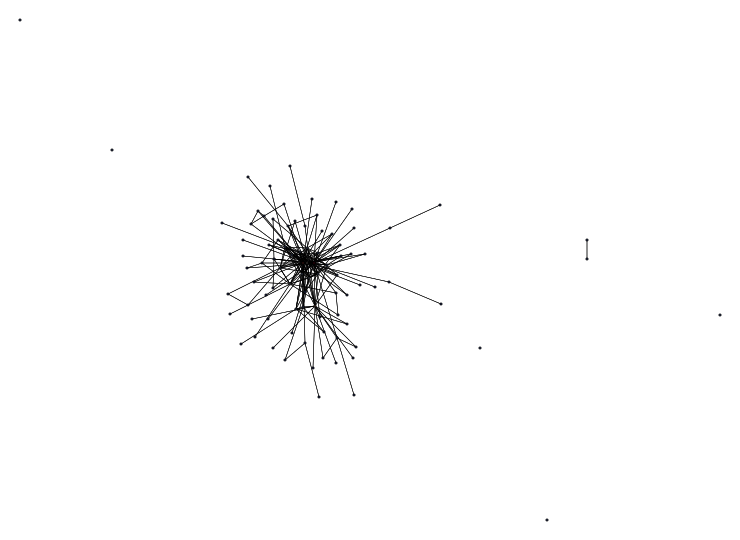

In [118]:
draw_graph(G_Corleone) 

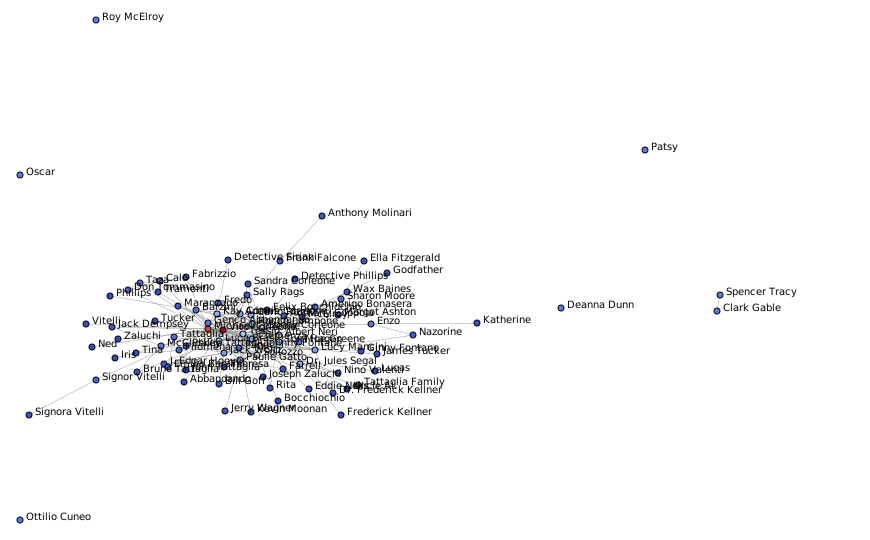

In [119]:
draw_graph(G_Corleone, edge_width=0.2, node_size=3, show_names=True) 

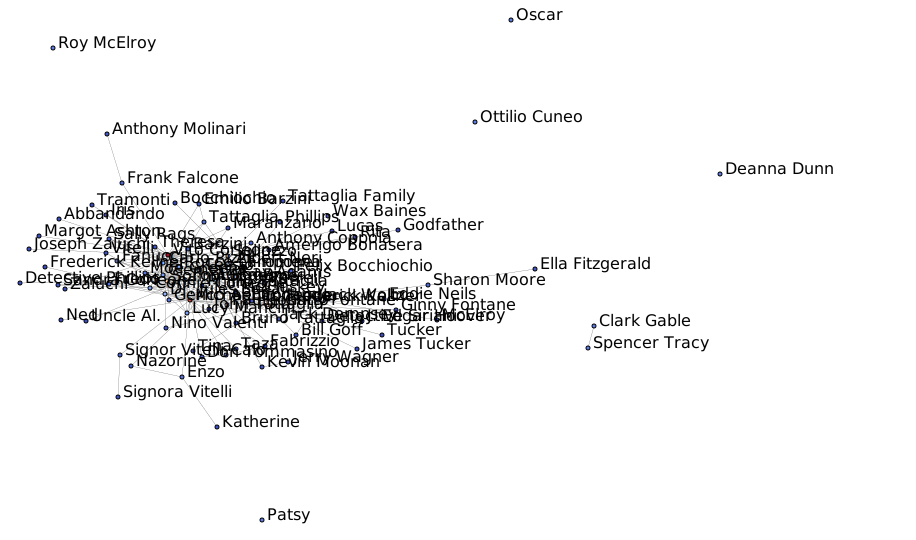

In [120]:
draw_graph(G_Corleone, edge_width=0.2, node_size=2, show_names=True, font_size=16) 

In [121]:
G_Corleone.remove_edges_from(nx.selfloop_edges(G_Corleone))

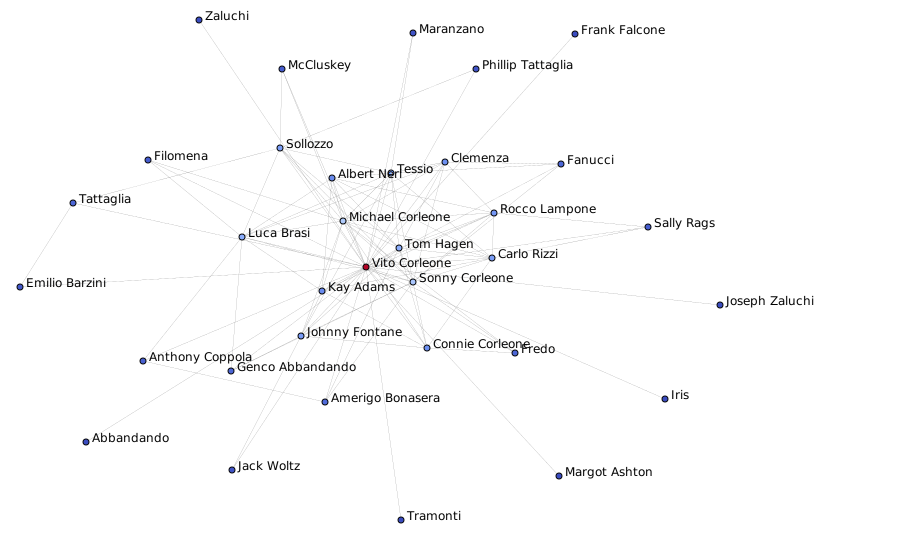

In [122]:
draw_ego_graph(G_Corleone, 'Vito Corleone') 

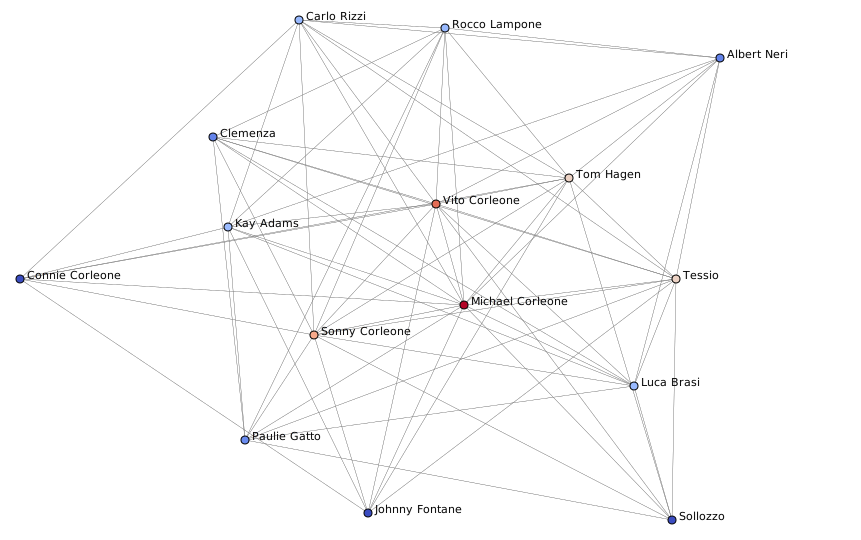

In [123]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)


In [96]:
##murder_1 = ['Luca Brasi']

##G_Corleone.remove_nodes_from(murder_1 )

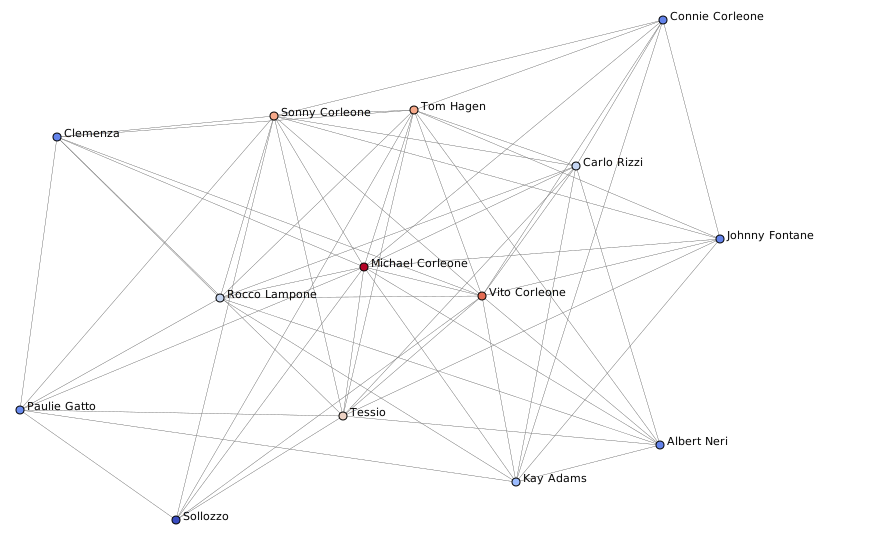

In [97]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)


In [98]:
##murder_2 = ['Paulie Gatto']

##G_Corleone.remove_nodes_from(murder_2 )

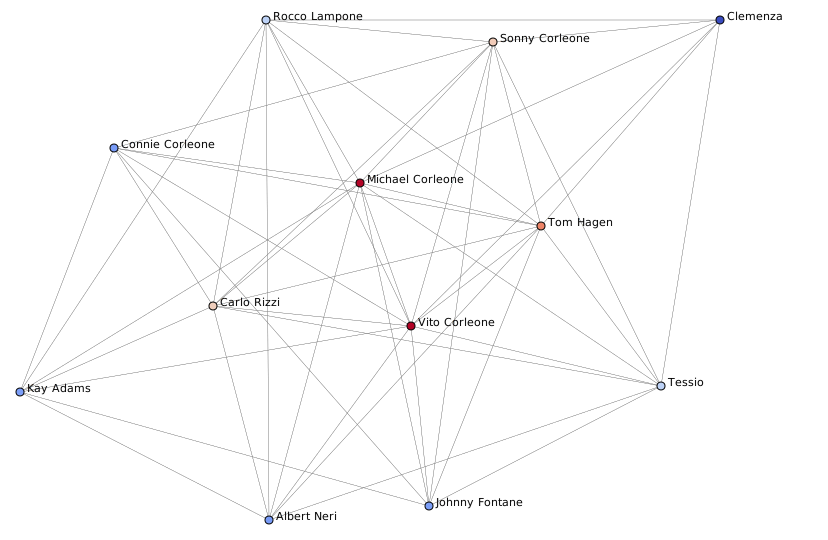

In [99]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)

In [100]:
##murder_3 = ['Carlo Rizzi']

##G_Corleone.remove_nodes_from(murder_3 )

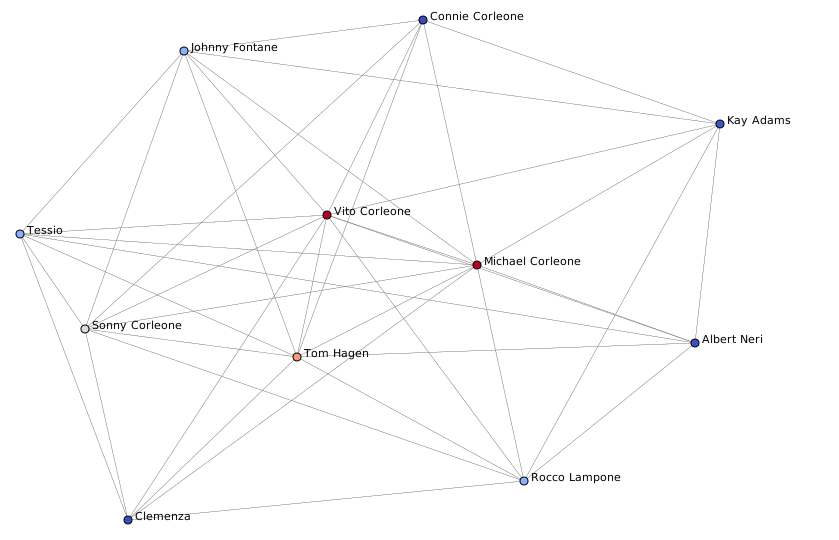

In [101]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)

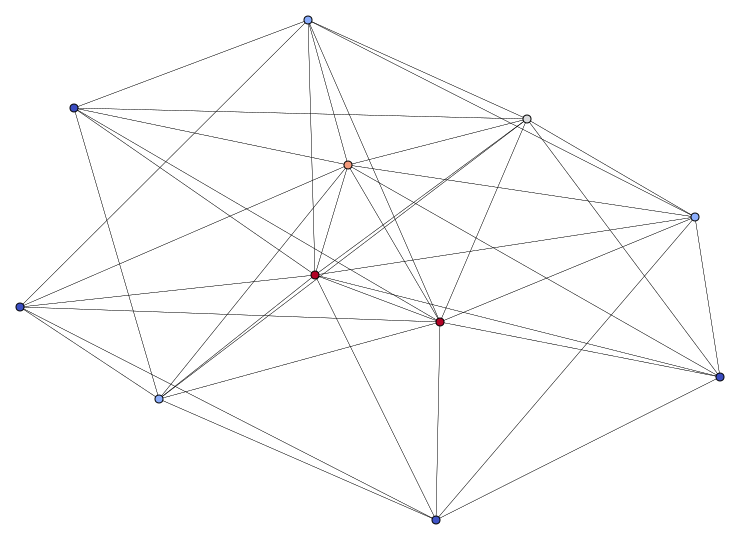

In [105]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=False, edge_width=0.3)

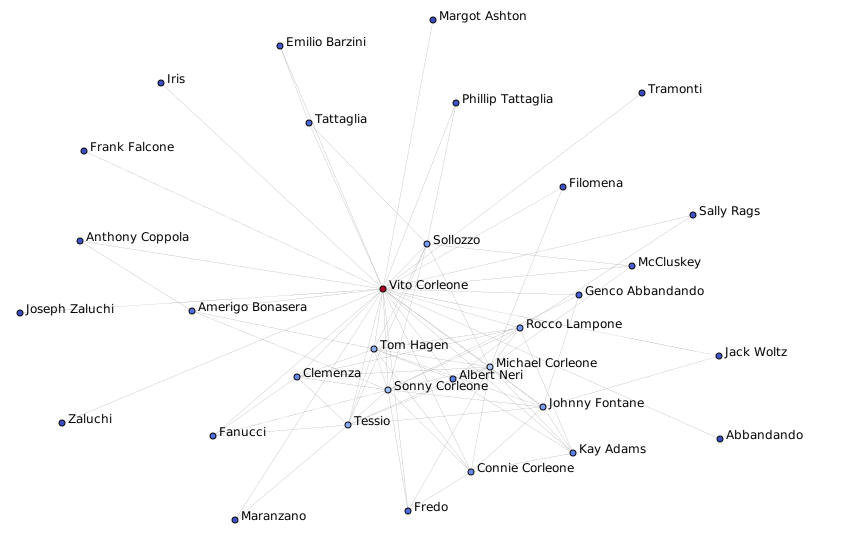

In [102]:
draw_ego_graph(G_Corleone, 'Vito Corleone') 

In [124]:
Hit_1 = ['Sonny Corleone']

G_Corleone.remove_nodes_from(Hit_1)

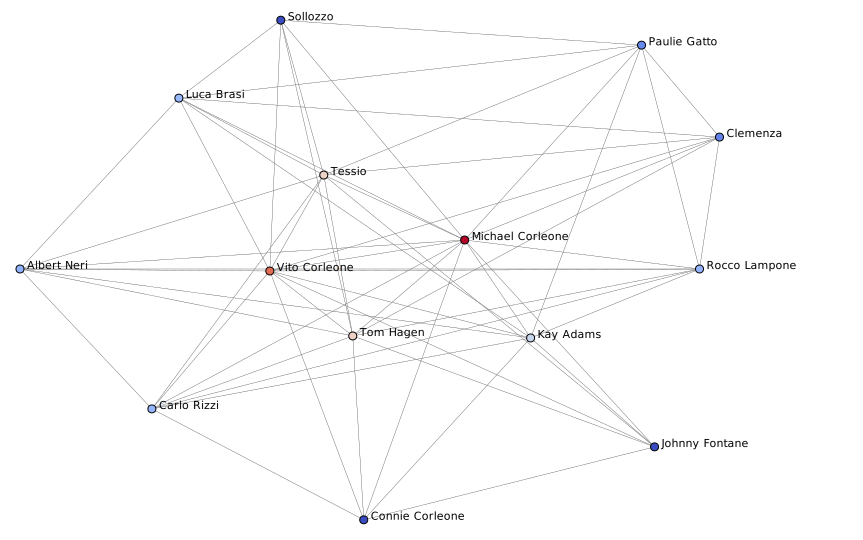

In [125]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)

In [126]:
Hit_2 = ['Vito Corleone']

G_Corleone.remove_nodes_from(Hit_2)

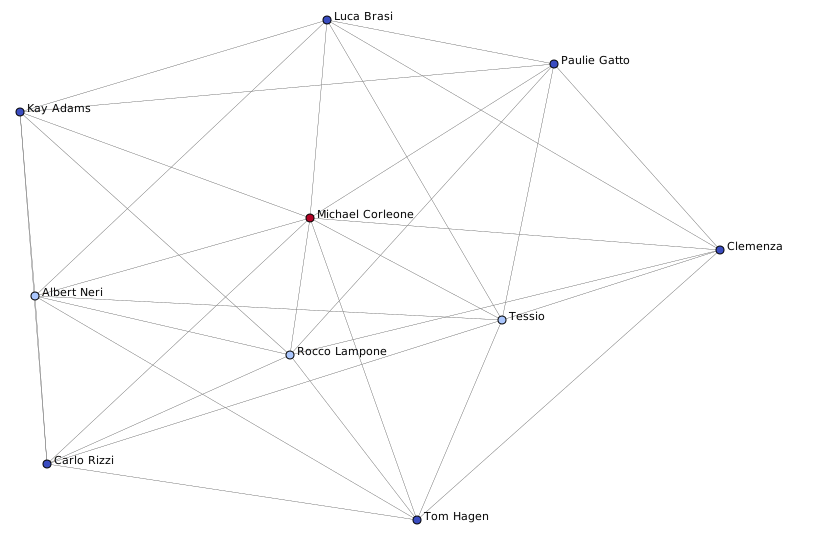

In [127]:
draw_graph(nx.k_core(G_Corleone, 6), node_size=4, font_size=11, show_names=True, edge_width=0.3)

In [130]:
Hit_3 = ['Michael Corleone']

G_Corleone.remove_nodes_from(Hit_3)

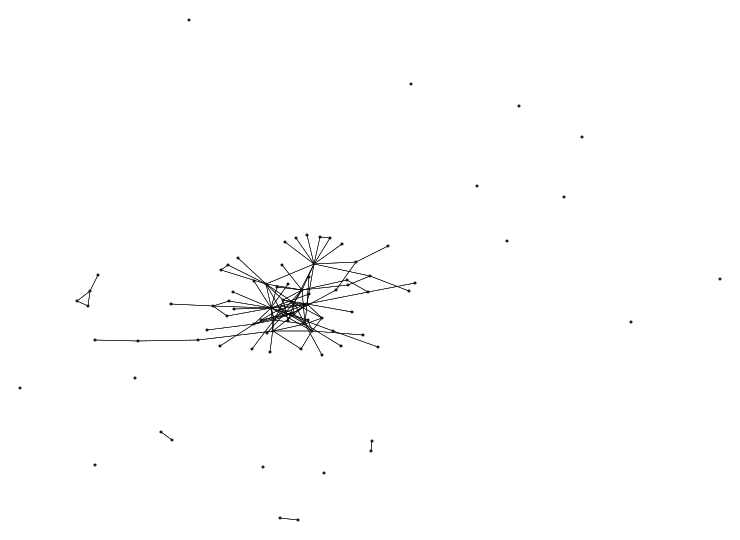

In [132]:
draw_graph(G_Corleone) 

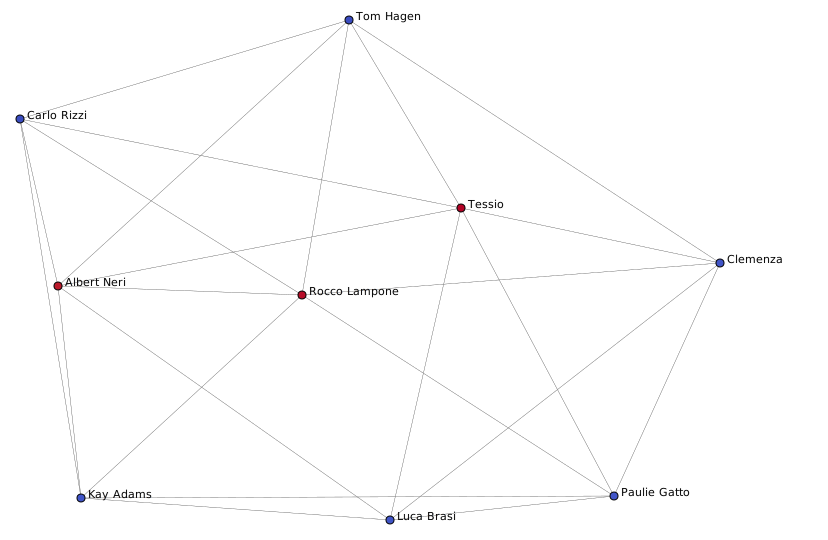

In [133]:
draw_graph(nx.k_core(G_Corleone), node_size=4, font_size=11, show_names=True, edge_width=0.3)

In [ ]:
Corleone_hits = ['Tom Hagen'
 ]

G_Corleone.remove_nodes_from(Corleone_hits)

In [ ]:
draw_graph(G_Corleone) 

In [ ]:
draw_graph(G_Corleone, edge_width=0.7, node_size=3, show_names=True) 

In [ ]:
draw_ego_graph(G_Corleone, 'Sonny Corleone', center=True) 

In [ ]:
draw_ego_graph(G_Corleone, 'Tom Hagen') 

In [ ]:
draw_ego_graph(G_Corleone, 'Michael Corleone') 

In [ ]:
draw_ego_graph(G_Corleone, 'Connie Corleone', center=True, k=1) 

In [ ]:
draw_ego_graph(G_Corleone, 'Luca Brasi') 

In [ ]:
draw_ego_graph(G_Corleone, 'Sandra Corleone') 

In [ ]:
draw_ego_graph(G_Corleone, 'Kay Adams') 

In [ ]:
draw_ego_graph(G_Corleone, 'Apollonia') 

In [ ]:
deg_cent = nx.degree_centrality(G_Corleone)

deg_cent_df = pd.DataFrame().from_dict(deg_cent, orient='index')
deg_cent_df.columns = ['degree_centrality']
deg_cent_df.sort_values('degree_centrality', ascending=False, inplace=True)
deg_cent_df.head(10)

In [ ]:
title = 'Characters with the Most Connections'

deg_cent_df.head(10).plot.barh(figsize=(10,6),color='#951233', title=title).invert_yaxis()

In [ ]:
betw_cent = nx.betweenness_centrality(G_Corleone)

betw_cent_df = pd.DataFrame().from_dict(betw_cent, orient='index')
betw_cent_df.columns = ['betweenness_centrality']
betw_cent_df.sort_values('betweenness_centrality', ascending=False, inplace=True)
betw_cent_df.head(10)

In [ ]:
 title = 'Characters Who Are Key in the Flow of Information'

betw_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

In [ ]:
close_cent = nx.closeness_centrality(G_Corleone)

close_cent_df = pd.DataFrame().from_dict(close_cent, orient='index')
close_cent_df.columns = ['closeness_centrality']
close_cent_df.sort_values('closeness_centrality', ascending=False, inplace=True)
close_cent_df.head(10)

In [ ]:
title = 'Important Characters by Closeness Centrality'

close_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()